In [5]:
import sys
path_to_scripts = '../scripts'
sys.path.append(path_to_scripts)
import os
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import json
import argparse
from colorama import Fore, Style, init
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from transformers import AutoConfig, AutoModel, AutoTokenizer

root_dir = "/Users/peetz/Documents/GitHub/LLM_Thesis"
data_dir = Path(root_dir, "data")

CrossRE = Path(data_dir, "pre-processed data", "CROSSRE","combined_dataset.json")


In [6]:
df = pd.read_json(CrossRE, orient="records", lines=True)

In [7]:
vertexSet = []
relations = []

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    for ver in row['vertexSet']:
        for v in ver:
            vertexSet.append(v['type'])
    for rel in row['labels']:
        relations.append(rel['r'])

from collections import Counter
# Counting the occurrences of each relation and entity type
relation_counts = Counter(relations)
entity_counts = Counter(vertexSet)

# Creating DataFrames for plotting
relation_df = pd.DataFrame(relation_counts.items(), columns=['Relation', 'Count'])
entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Count'])


Processing data: 100%|██████████| 5409/5409 [00:00<00:00, 60081.28it/s]


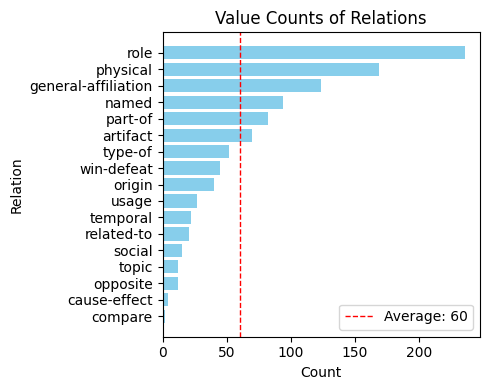

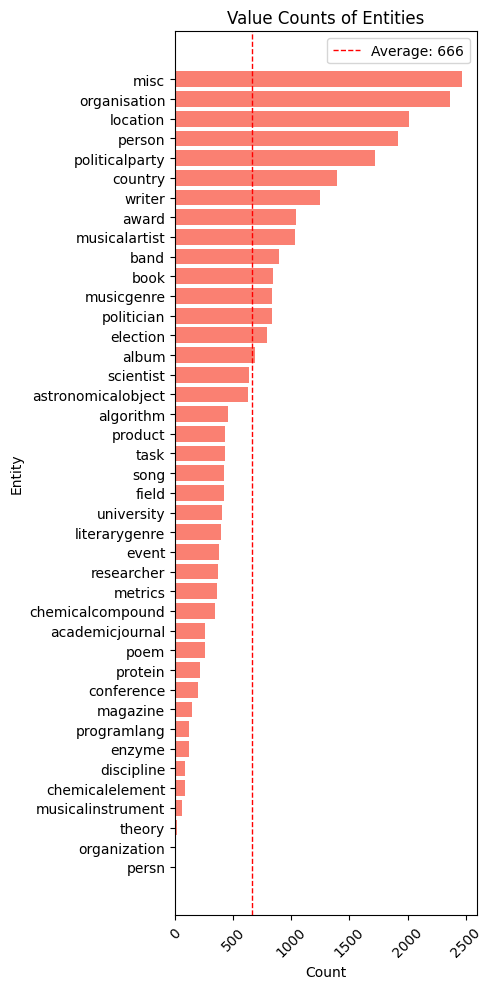

In [8]:
# Plotting the value counts of relations horizontally
relation_df = relation_df.sort_values(by='Count', ascending=True)
average_relation_count = relation_df['Count'].mean()

plt.figure(figsize=(5, 4))
plt.barh(relation_df['Relation'], relation_df['Count'], color='skyblue')
plt.axvline(average_relation_count, color='red', linestyle='--', linewidth=1, label=f'Average: {average_relation_count:.0f}')
plt.xlabel('Count')
plt.ylabel('Relation')
plt.title('Value Counts of Relations')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the value counts of entities
entity_df = entity_df.sort_values(by='Count', ascending=True)
average_entity_count = entity_df['Count'].mean()

plt.figure(figsize=(5, 10))
plt.barh(entity_df['Entity'], entity_df['Count'], color='salmon')
plt.axvline(average_entity_count, color='red', linestyle='--', linewidth=1, label=f'Average: {average_entity_count:.0f}')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Value Counts of Entities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Extract domains and split
domains = list(set([row['domains'].split('-')[0] for idx, row in df.iterrows()])) # Get unique domains
domains

['science', 'music', 'NLP', 'ai', 'politics', 'linguist', 'literature', 'news']

Processing data: 100%|██████████| 5409/5409 [00:00<00:00, 57757.69it/s]


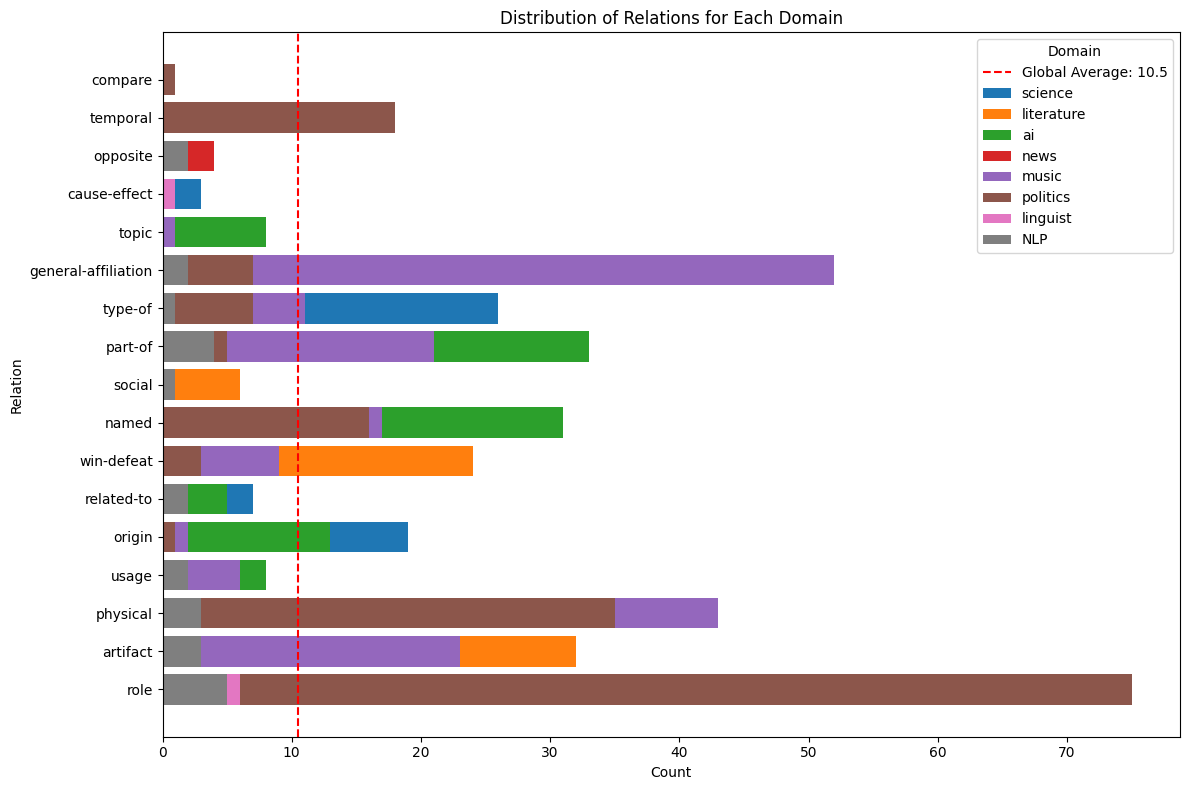

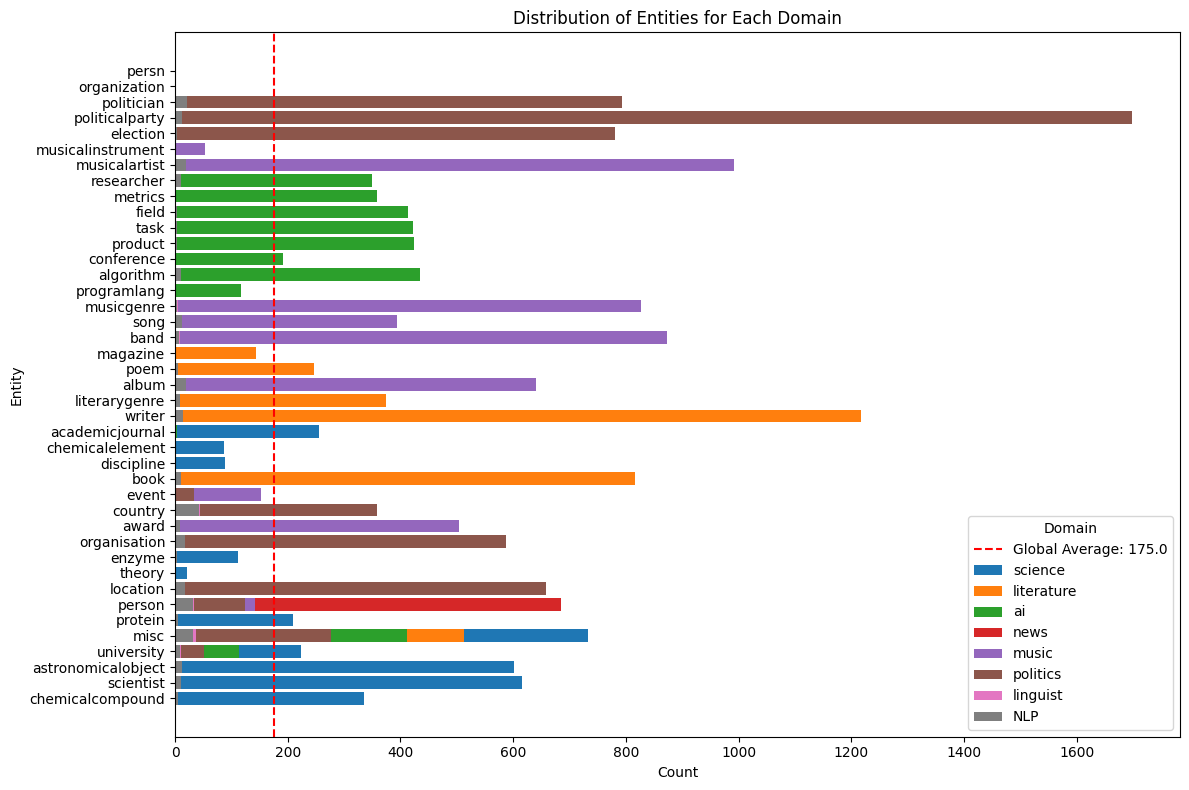

In [10]:
# Extracting and counting entities and relations per domain
domain_entities = {}
domain_relations = {}

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    domain = row['domains'].split('-')[0]
    if domain not in domain_entities:
        domain_entities[domain] = []
    if domain not in domain_relations:
        domain_relations[domain] = []

    for ver in row['vertexSet']:
        for v in ver:
            domain_entities[domain].append(v['type'])
    for rel in row['labels']:
        domain_relations[domain].append(rel['r'])

# Creating DataFrames for plotting
entity_df_list = []
relation_df_list = []

for domain, entities in domain_entities.items():
    entity_counts = Counter(entities)
    for entity, count in entity_counts.items():
        entity_df_list.append({'Domain': domain, 'Entity': entity, 'Count': count})

for domain, relations in domain_relations.items():
    relation_counts = Counter(relations)
    for relation, count in relation_counts.items():
        relation_df_list.append({'Domain': domain, 'Relation': relation, 'Count': count})

entity_df = pd.DataFrame(entity_df_list)
relation_df = pd.DataFrame(relation_df_list)

# Calculating global averages
global_avg_entities = entity_df['Count'].mean()
global_avg_relations = relation_df['Count'].mean()

# Plotting the distribution of relations for each domain
plt.figure(figsize=(12, 8))
for domain in relation_df['Domain'].unique():
    subset = relation_df[relation_df['Domain'] == domain]
    plt.barh(subset['Relation'], subset['Count'], label=domain)

plt.axvline(x=global_avg_relations, color='r', linestyle='--', label=f'Global Average: {global_avg_relations:.1f}')

plt.xlabel('Count')
plt.ylabel('Relation')
plt.title('Distribution of Relations for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

# Plotting the distribution of entities for each domain
plt.figure(figsize=(12, 8))
for domain in entity_df['Domain'].unique():
    subset = entity_df[entity_df['Domain'] == domain]
    plt.barh(subset['Entity'], subset['Count'], label=domain)

plt.axvline(x=global_avg_entities, color='r', linestyle='--', label=f'Global Average: {global_avg_entities:.1f}')

plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Entities for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

## Reduced format


In [11]:
CrossRE = Path(data_dir, "pre-processed data", "CROSSRE","combined_dataset_corrected.json")

df = pd.read_json(CrossRE, orient="records", lines=False)


Processing data: 100%|██████████| 5400/5400 [00:00<00:00, 56477.67it/s]


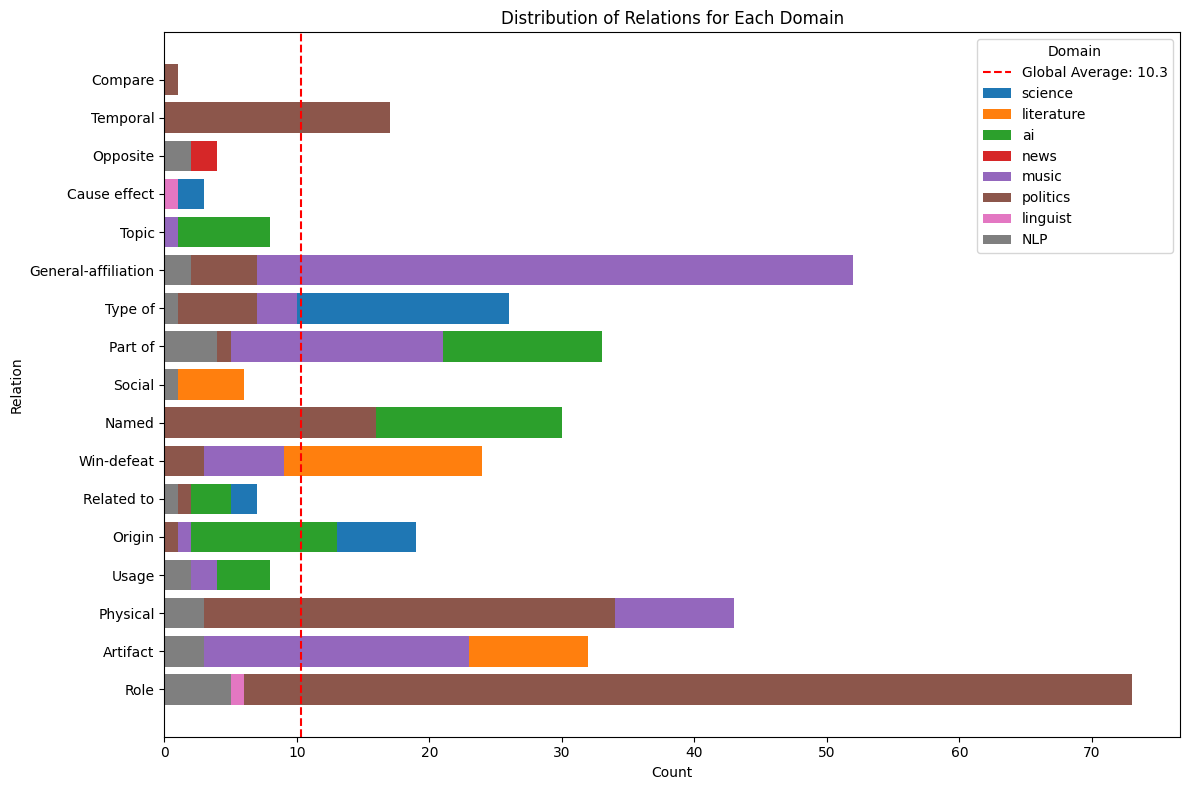

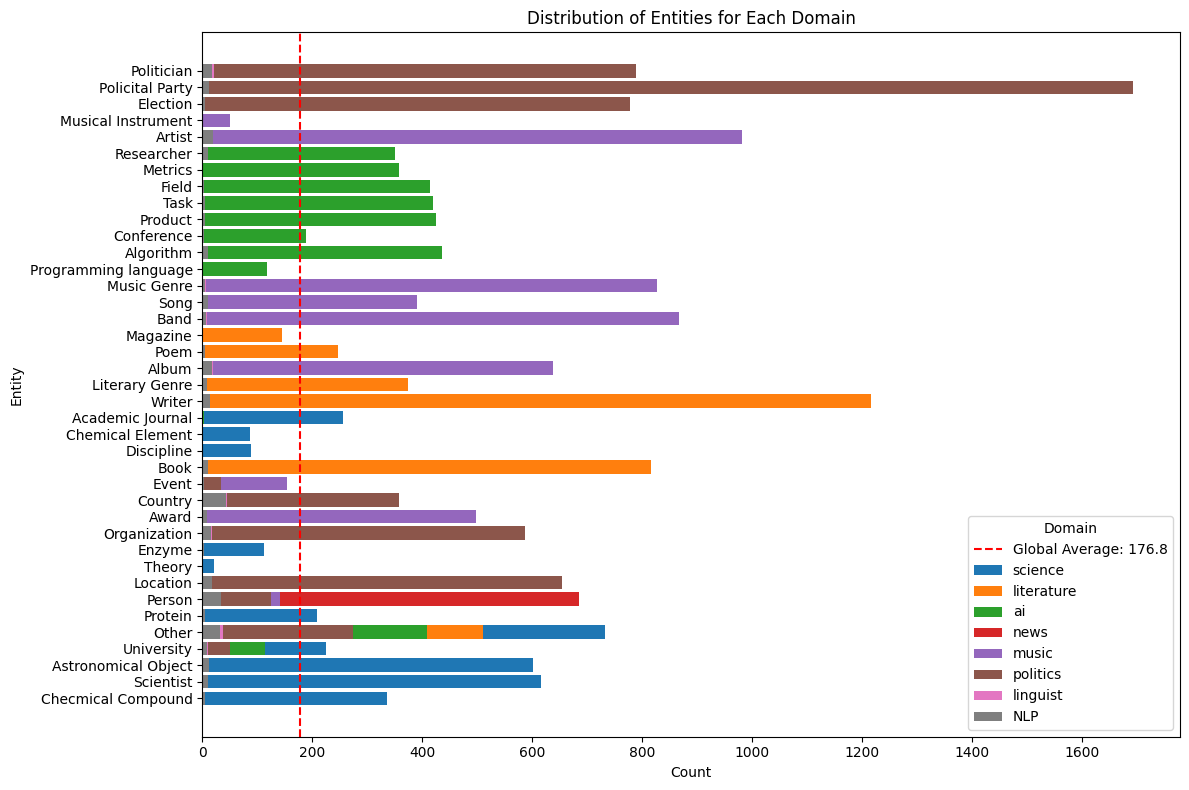

In [12]:
# Extracting and counting entities and relations per domain
domain_entities = {}
domain_relations = {}

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    domain = row['domains'].split('-')[0]
    if domain not in domain_entities:
        domain_entities[domain] = []
    if domain not in domain_relations:
        domain_relations[domain] = []

    for ver in row['vertexSet']:
        for v in ver:
            domain_entities[domain].append(v['type'])
    for rel in row['labels']:
        domain_relations[domain].append(rel['r'])

# Creating DataFrames for plotting
entity_df_list = []
relation_df_list = []

for domain, entities in domain_entities.items():
    entity_counts = Counter(entities)
    for entity, count in entity_counts.items():
        entity_df_list.append({'Domain': domain, 'Entity': entity, 'Count': count})

for domain, relations in domain_relations.items():
    relation_counts = Counter(relations)
    for relation, count in relation_counts.items():
        relation_df_list.append({'Domain': domain, 'Relation': relation, 'Count': count})

entity_df = pd.DataFrame(entity_df_list)
relation_df = pd.DataFrame(relation_df_list)

# Calculating global averages
global_avg_entities = entity_df['Count'].mean()
global_avg_relations = relation_df['Count'].mean()

# Plotting the distribution of relations for each domain
plt.figure(figsize=(12, 8))
for domain in relation_df['Domain'].unique():
    subset = relation_df[relation_df['Domain'] == domain]
    plt.barh(subset['Relation'], subset['Count'], label=domain)

plt.axvline(x=global_avg_relations, color='r', linestyle='--', label=f'Global Average: {global_avg_relations:.1f}')

plt.xlabel('Count')
plt.ylabel('Relation')
plt.title('Distribution of Relations for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

# Plotting the distribution of entities for each domain
plt.figure(figsize=(12, 8))
for domain in entity_df['Domain'].unique():
    subset = entity_df[entity_df['Domain'] == domain]
    plt.barh(subset['Entity'], subset['Count'], label=domain)

plt.axvline(x=global_avg_entities, color='r', linestyle='--', label=f'Global Average: {global_avg_entities:.1f}')

plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Entities for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

In [13]:
import seaborn as sns

In [14]:
test = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/CrossRE/test.json", orient="records", lines=False)
dev = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/CrossRE/dev.json", orient="records", lines=False)
train = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/CrossRE/train.json", orient="records", lines=False)
distant = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/CrossRE/train_distant.json", orient="records", lines=False)

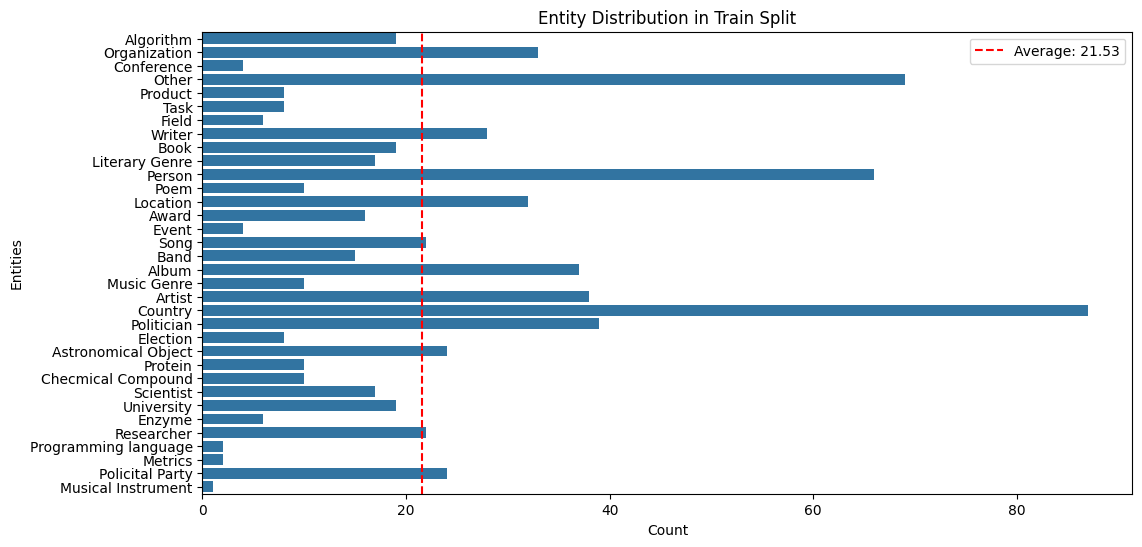

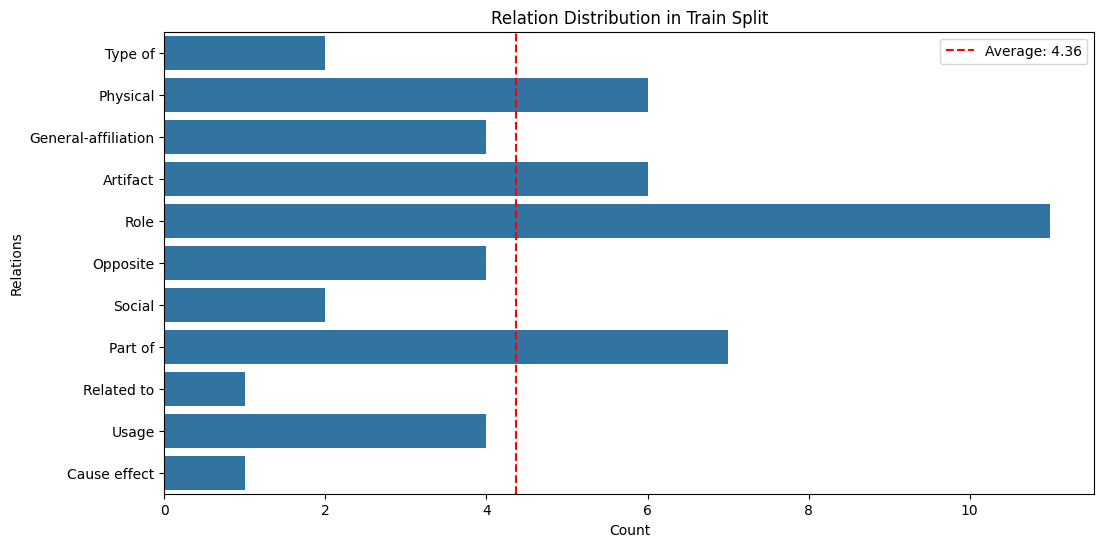

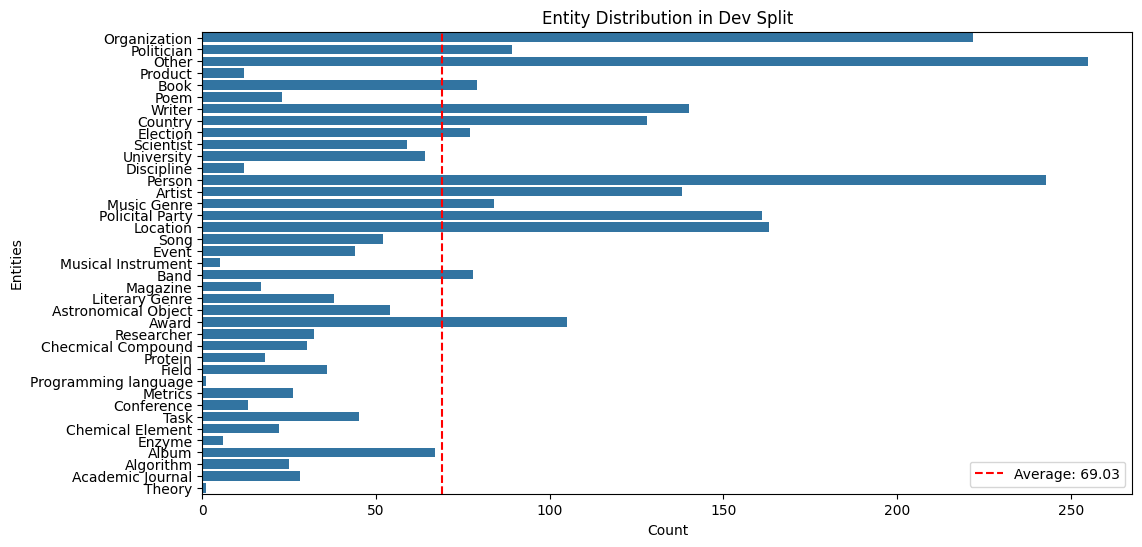

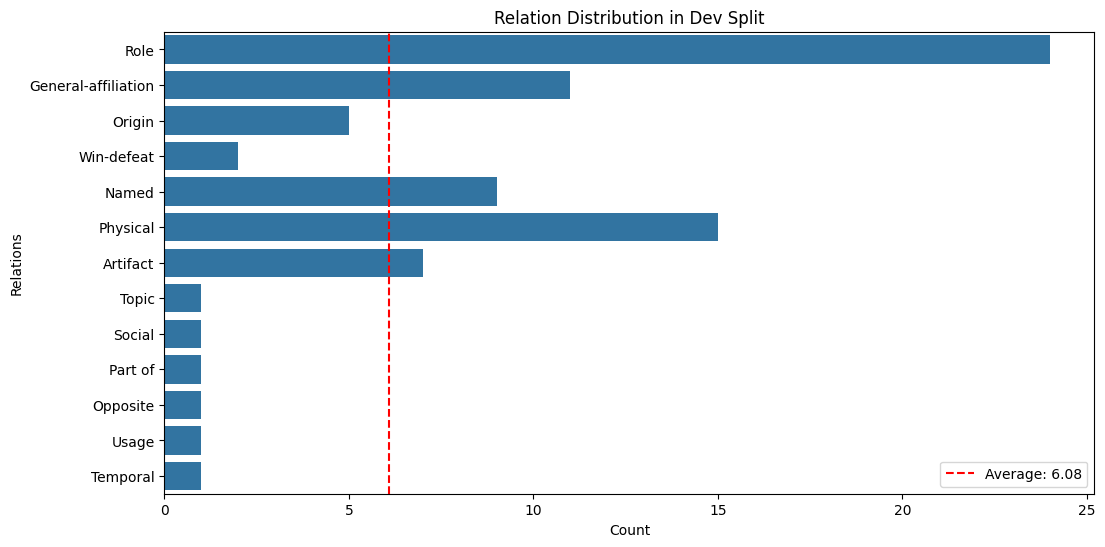

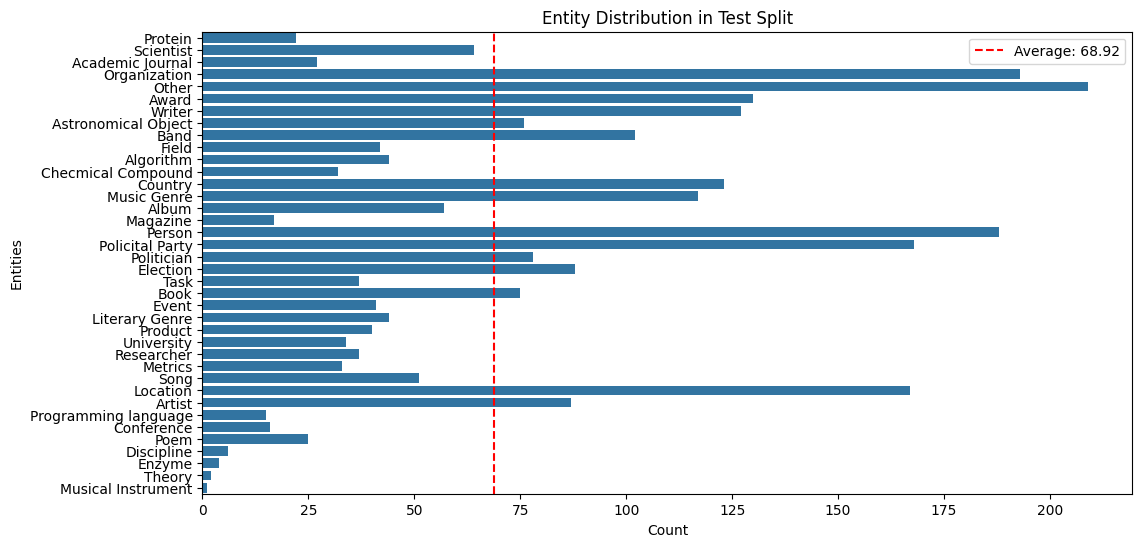

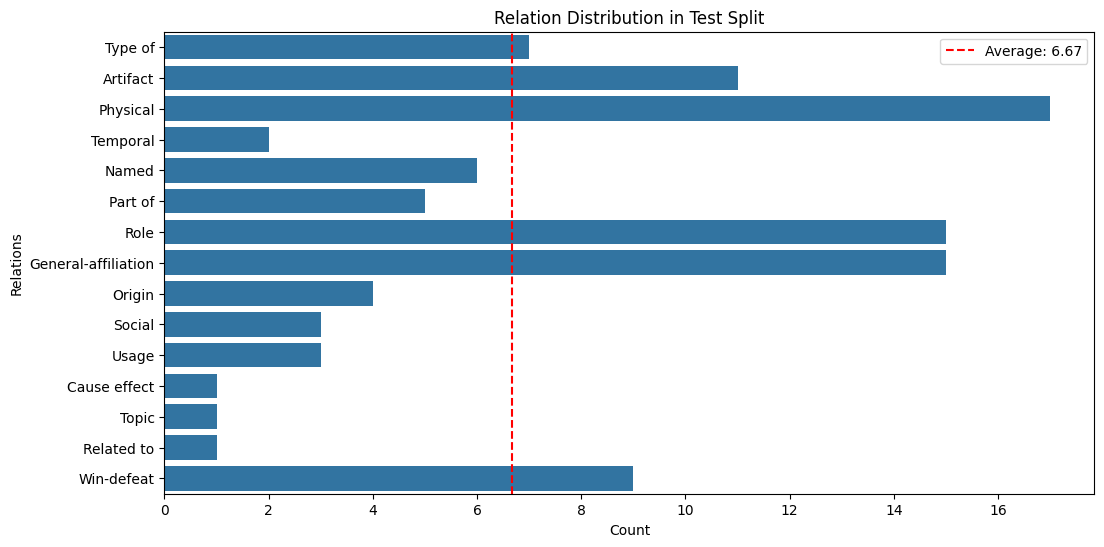

In [15]:
# def get_data_split(df, dataset_name=None, output_dir=None, gen_new_distant=True, output=True):
#     if "dataset" not in df.columns and dataset_name is None:
#         raise ValueError("DataFrame must contain a 'dataset' column or a 'dataset_name' must be specified.")

#     if dataset_name:  
#         if dataset_name == "DocRED":
#             print(f"Processing {dataset_name} data...")
#             distant = df[df["original_file_path"].str.contains("distant")]
#             un_distant = df[~df["original_file_path"].str.contains("distant")]
#             test = un_distant[un_distant["original_file_path"].str.contains("test")]
#             remainder = un_distant[~un_distant["original_file_path"].str.contains("test")]
#             if not gen_new_distant:
#                 print("Combining distant and non-distant data...")
#                 remainder = pd.concat([distant, remainder])
#             train, dev = train_test_split(remainder, test_size=0.5, random_state=42)
#         elif dataset_name == "NYT":
#             print(f"Processing {dataset_name} data...")
#             if gen_new_distant:
#                 df, distant = train_test_split(df, train_size=0.1, random_state=42)
#             test = df[df["original_file_path"].str.contains("test")]
#             dev = df[df["original_file_path"].str.contains("valid")]
#             train = df[df["original_file_path"].str.contains("train")]
#         elif dataset_name == "sciERC":
#             print(f"Processing {dataset_name} data...")
#             if gen_new_distant:
#                 df, distant = train_test_split(df, train_size=0.1, random_state=42)
#             test = df[df["original_file_path"].str.contains("test")]
#             dev = df[df["original_file_path"].str.contains("dev")]
#             train = df[df["original_file_path"].str.contains("train")]
#         elif dataset_name == "CoNLL04":
#             print(f"Processing {dataset_name} data...")
#             if gen_new_distant:
#                 df, distant = train_test_split(df, train_size=0.1, random_state=42)
#             dev, test = train_test_split(df, test_size=0.66, random_state=42)
#             train, dev = train_test_split(dev, test_size=0.5, random_state=42)
#         elif dataset_name == "CrossRE":
#             print(f"Processing {dataset_name} data...")
#             if gen_new_distant:
#                 gold1 = df[df["original_file_path"].str.contains("NLP")]
#                 gold2 = df[df["original_file_path"].str.contains("linguist")]
#                 train = pd.concat([gold1, gold2])
#                 remainder = df[~df.index.isin(train.index)]
#                 remainder, distant = train_test_split(remainder, test_size=0.8, random_state=42)
#                 dev, test = train_test_split(remainder, test_size=0.5, random_state=42)
#         elif dataset_name == "ALL":
#             print("Combining all datasets...")
#             distant_dfs, test_dfs, dev_dfs, train_dfs = [], [], [], []

#             for dataset in ["DocRED", "NYT", "sciERC", "CoNLL04", "CrossRE"]:
#                 current_df = df[df["org_dataset"] == dataset]
#                 train, dev, test, distant = get_data_split(current_df, dataset_name=dataset, gen_new_distant=gen_new_distant)
#                 distant_dfs.append(distant)
#                 test_dfs.append(test)
#                 dev_dfs.append(dev)
#                 train_dfs.append(train)

#             distant = pd.concat(distant_dfs)
#             test = pd.concat(test_dfs)
#             dev = pd.concat(dev_dfs)
#             train = pd.concat(train_dfs)
#         else:
#             raise ValueError("Unsupported dataset_name provided.")

#     if output_dir is None:
#         output_dir = str(Path(root_dir, "processed_data", dataset_name))
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     if output:
#         train.to_json(Path(output_dir, "train.json"), orient="records", lines=False)
#         dev.to_json(Path(output_dir, "dev.json"), orient="records", lines=False)
#         test.to_json(Path(output_dir, "test.json"), orient="records", lines=False)
#         if gen_new_distant:
#             distant.to_json(Path(output_dir, "train_distant.json"), orient="records", lines=False)
#     if gen_new_distant: 
#         return train, dev, test, distant
#     else: 
#         return train, dev, test, None

# Function to extract entities and relations from the vertexSet and labels columns
def extract_entities_relations(split):
    entities = []
    relations = []
    for index, row in split.iterrows():
        entities.extend([entity['type'] for entity_set in row['vertexSet'] for entity in entity_set])
        relations.extend([label['r'] for label in row['labels']])
    return pd.Series(entities), pd.Series(relations)

# Function to calculate average counts
def calculate_average_counts(series):
    value_counts = series.value_counts()
    return value_counts.mean()

# Plotting function
def plot_distribution(data, avg_count, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data)
    plt.axvline(x=avg_count, color='r', linestyle='--', label=f'Average: {avg_count:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


# train, dev, test, _ = get_data_split(df, dataset_name='CrossRE', output=False)

# Extract entities and relations for each split
train_entities, train_relations = extract_entities_relations(train)
dev_entities, dev_relations = extract_entities_relations(dev)
test_entities, test_relations = extract_entities_relations(test)

# Calculate average counts
avg_train_entities = calculate_average_counts(train_entities)
avg_train_relations = calculate_average_counts(train_relations)
avg_dev_entities = calculate_average_counts(dev_entities)
avg_dev_relations = calculate_average_counts(dev_relations)
avg_test_entities = calculate_average_counts(test_entities)
avg_test_relations = calculate_average_counts(test_relations)

# Plotting the distributions
plot_distribution(train_entities, avg_train_entities, 'Entity Distribution in Train Split', 'Count', 'Entities')
plot_distribution(train_relations, avg_train_relations, 'Relation Distribution in Train Split', 'Count', 'Relations')

plot_distribution(dev_entities, avg_dev_entities, 'Entity Distribution in Dev Split', 'Count', 'Entities')
plot_distribution(dev_relations, avg_dev_relations, 'Relation Distribution in Dev Split', 'Count', 'Relations')

plot_distribution(test_entities, avg_test_entities, 'Entity Distribution in Test Split', 'Count', 'Entities')
plot_distribution(test_relations, avg_test_relations, 'Relation Distribution in Test Split', 'Count', 'Relations')


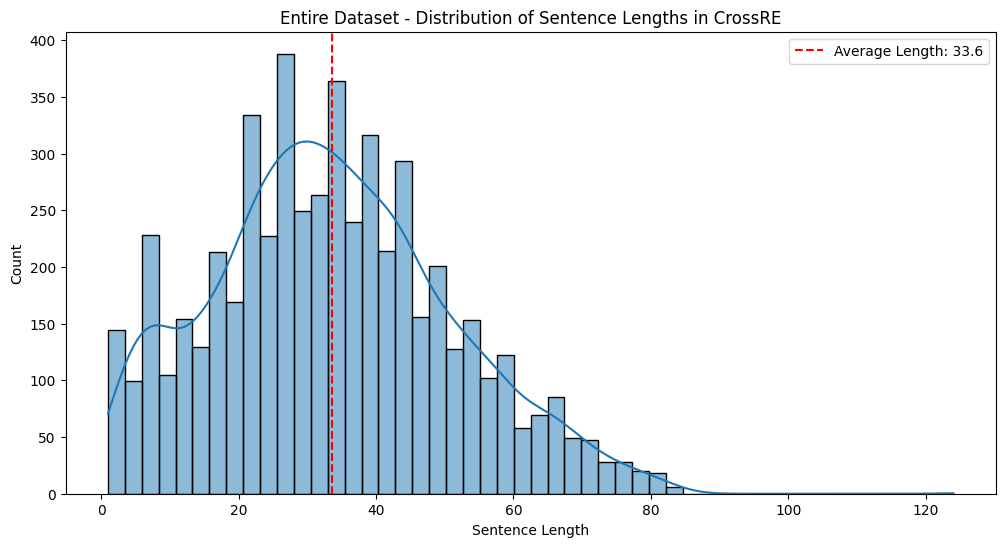

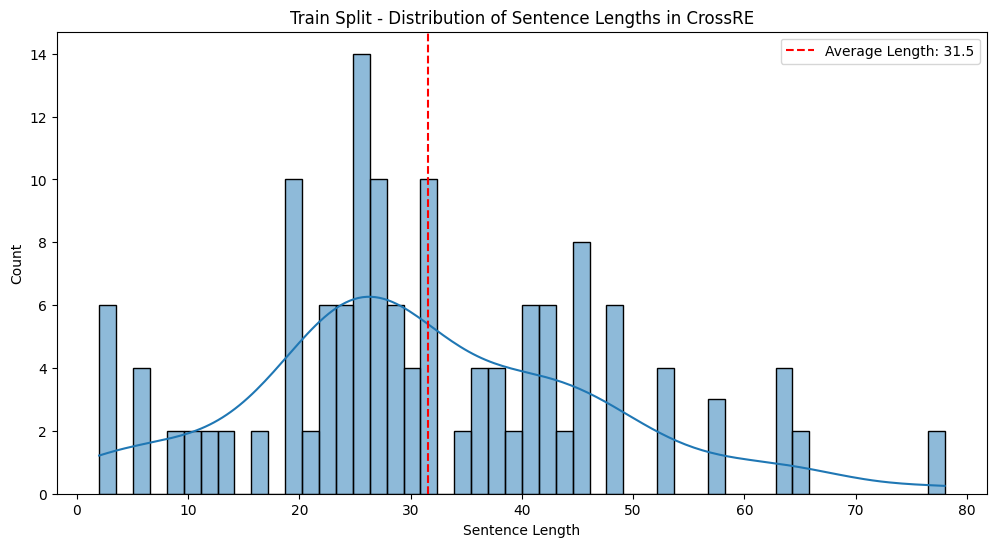

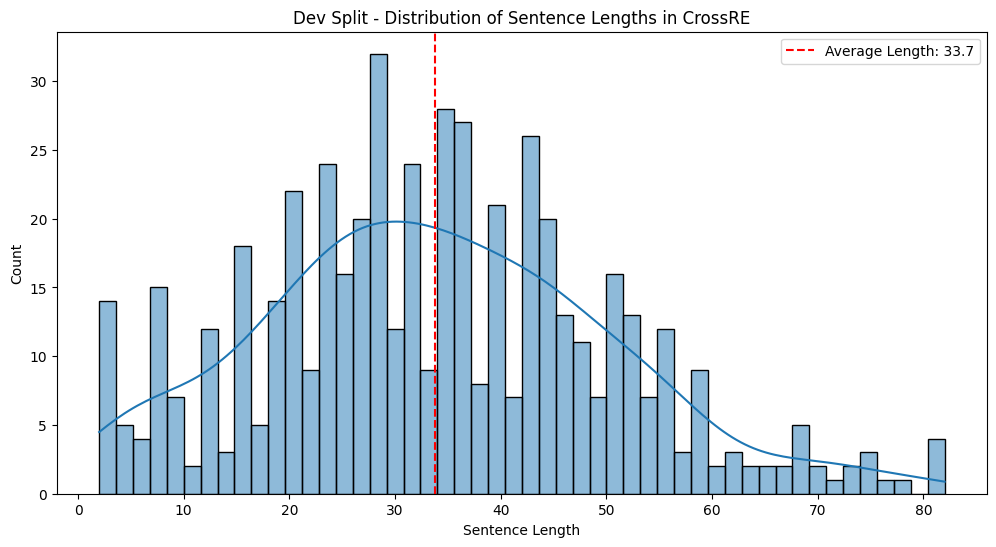

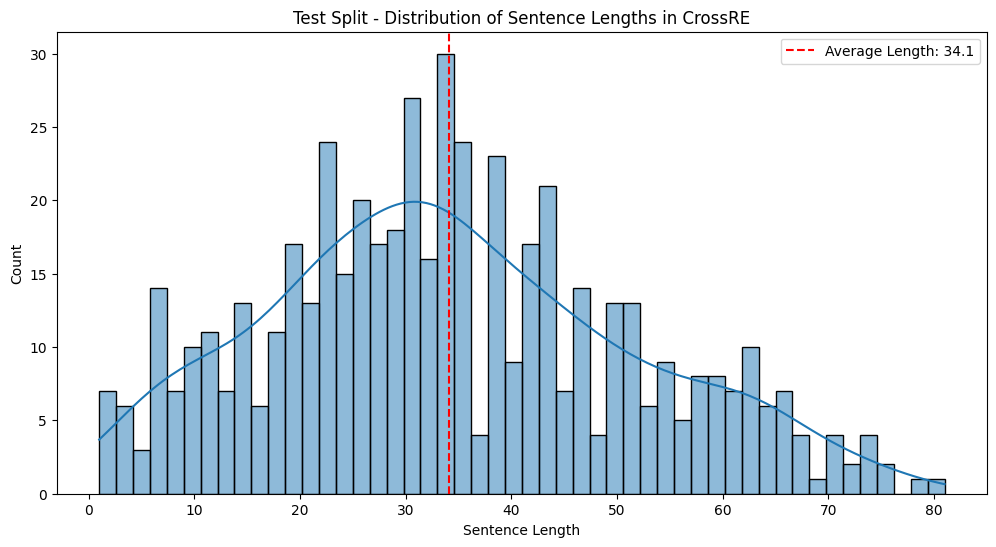

In [16]:
# Function to calculate and plot sentence length distribution
def plot_sentence_length_distribution(dataset_name, dataset_df, title_prefix):
    sent_length = []
    for sent in dataset_df['sents']:
        for s in sent:
            sent_length.append(len(s))
    avg_length = sum(sent_length) / len(sent_length)
    plt.figure(figsize=(12, 6))
    sns.histplot(sent_length, bins=50, kde=True)
    plt.axvline(x=avg_length, color='r', linestyle='--', label=f'Average Length: {avg_length:.1f}')
    plt.xlabel('Sentence Length')
    plt.ylabel('Count')
    plt.title(f'{title_prefix} - Distribution of Sentence Lengths in {dataset_name}')
    plt.legend()
    plt.show()

# Plot for the entire dataset
for dataset in df['org_dataset'].unique():
    dataset_df = df[df['org_dataset'] == dataset]
    plot_sentence_length_distribution(dataset, dataset_df, 'Entire Dataset')

# Plot for the individual splits
for split_name, split_df in [('Train Split', train), ('Dev Split', dev), ('Test Split', test)]:
    for dataset in split_df['org_dataset'].unique():
        dataset_df = split_df[split_df['org_dataset'] == dataset]
        plot_sentence_length_distribution(dataset, dataset_df, split_name)